# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# Select three indices of your choice you wish to sample from the dataset
indices = [85,93,142]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16117,46197,92780,1026,40827,2944
1,11314,3090,2062,35009,71,2698
2,37036,7152,8253,2995,20,3


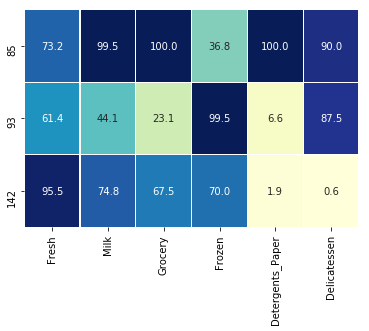

In [4]:
# Percentile ranks for samples
ranks = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)

# Percentile heatmap
sns.heatmap(ranks, annot=True, linewidth=.1, vmax=99, fmt='.1f', cmap='YlGnBu', cbar=False);

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Frozen: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer: Sample 1 is in the upper quartile for Milk, Grocery, Detergents-Paper and Delicatessen products and 73 percentile for Fresh.  For Grocery and Detergents-Paper it has the most purchases for all customers.  This definitely suggests the purchases of a high volume market or warehouse reseller because of the volume and diversity of purchases. **

** Sample 2 is in the upper quartile for Frozen and Delicatessen products and 61 percentile for Fresh.  This suggests the customer is an establishment such as a deli or restaurant that relies heavily on frozen products mixed in with fresh/deli type offerings. **

** Sample 3 is similar to Sample 2 but in the 95 percentile for Fresh but virtually no Delicatessen purchases.  This suggests a more high-end restaurant that focuses on healthy fresh offerings.  Detergents-Paper being in the lower quartile for both Sample 2 and 3 also suggests that they are both customers that are utilizing these purchase for their own need instead of reselling. **

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Make a copy of the DataFrame, using the 'drop' function to drop the given feature
SEED = 42
label = 'Delicatessen'
features_train = data.copy()
labels_train = features_train[label]
features_train.drop(label, axis=1, inplace=True)

# Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(features_train, labels_train, test_size=.25, random_state=SEED)

# Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=SEED).fit(X_train, y_train)

y_pred = regressor.predict(X_test)

# Report the score of the prediction using the testing set
score = r2_score(y_test, y_pred)

print("The R2 score is: '{:.4f}'".format(score))

The R2 score is: '-2.2547'


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer: The feature I attempted to predict was Delicatessen.  The R2 score was -2.2547.  Since the coefficient of determination is negative it indicates the other features do not explain the variance at all.  Therefore, Delicatessen would be a very important feature to identify customer spending habits because it differentiates purchases. **

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

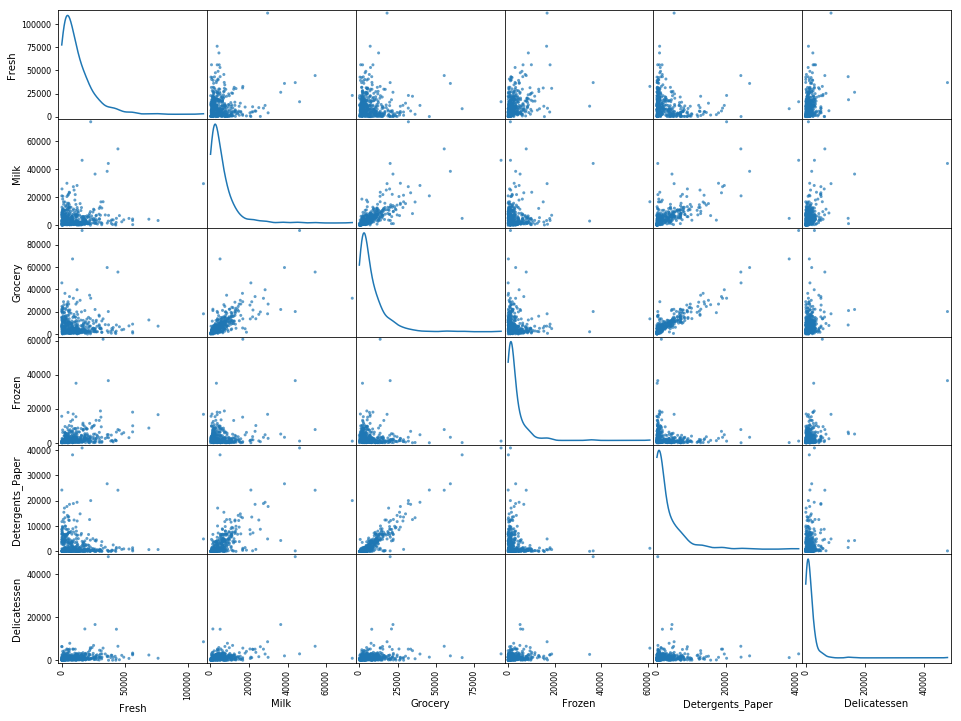

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.7, figsize = (16,12), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

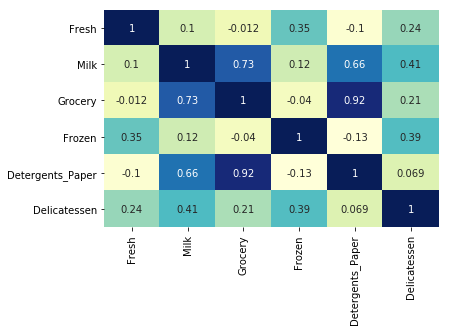

In [7]:
# Correlation heatmap
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', cbar=False);

**Answer: All 6 feature distributions are not normal and are all very similarily right skewed as shown diagonally in the scatter matrix.  This was also shown earlier in the descriptive statistics with each mean greater than the median.  **

** Milk and Grocery, Milk and Detergents-Paper and Grocery and Detergents-Paper exhibit positive correlation in the scatter matrix and supported in the correlation heatmap at .73, .66 and .92 respectively.  Delicatessen does not have any strong correlation with any other product so this confirms my suspicion about this feature.  It also confirms the R2 score we observed earlier in the model to predict Delicatessen purchases. **

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

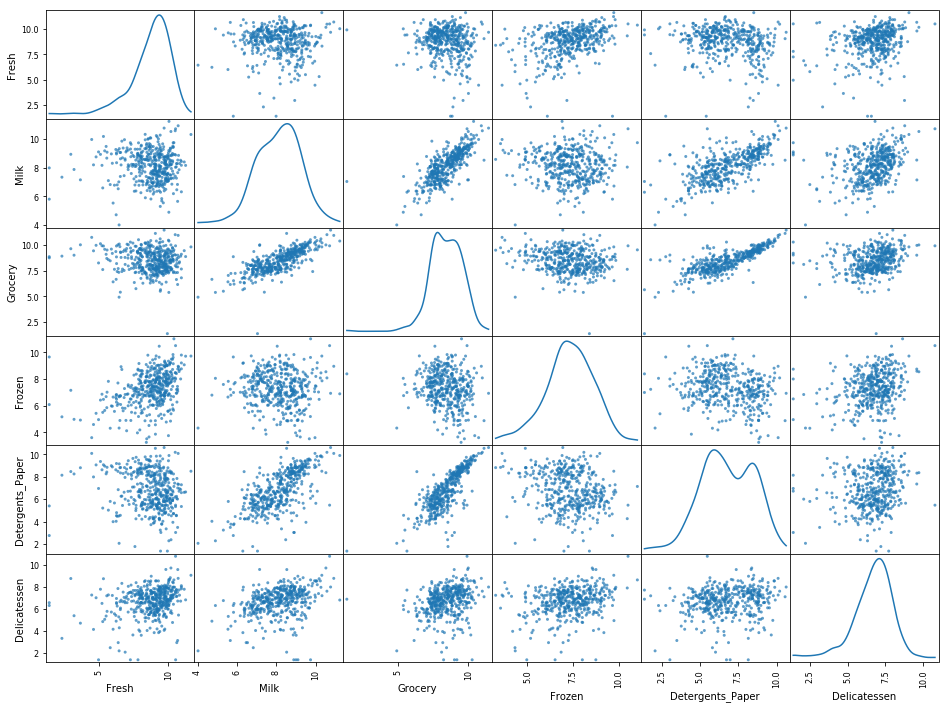

In [8]:
# Scale the data using the natural logarithm
log_data = data.apply(lambda x: np.log(x + 1))

# Scale the sample data using the natural logarithm
log_samples = samples.apply(lambda x: np.log(x + 1))

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.7, figsize = (16,12), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [9]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.687692,10.740692,11.437997,6.934397,10.617123,7.987864
1,9.333885,8.036250,7.631917,10.463389,4.276666,7.900637
2,10.519673,8.875287,9.018453,8.005033,3.044522,1.386294


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [10]:
# Function to review outliers at different IQR steps
def iqr_outliers(multiplier):

    # This will include duplicate indices for each feature
    outliers  = []

    # For each feature find the data points with extreme high or low values
    for feature in log_data.keys():

        # Calculate Q1 (25th percentile of the data) for the given feature
        Q1 = np.percentile(log_data[feature],25)

        # Calculate Q3 (75th percentile of the data) for the given feature
        Q3 = np.percentile(log_data[feature],75)

        # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
        step = multiplier * (Q3 - Q1)

        # Display the outliers
        print("Data points considered outliers for the feature '{}':".format(feature))
        display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])

        feature_outliers = log_data[~((log_data[feature] >= Q1 - step) & \
                                              (log_data[feature] <= Q3 + step))].index.tolist()

        # Select the indices for data points you wish to remove
        outliers.extend(feature_outliers)
    
    return outliers

# Review outliers based on 1.5 IQR
outliers_abnormal = iqr_outliers(1.5)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.454347,9.950371,10.732672,3.610918,10.095429,7.261225
66,2.302585,7.336286,8.911665,5.170484,8.151622,3.332205
81,5.393628,9.163354,9.575261,5.648974,8.964312,5.056246
95,1.386294,7.979681,8.740817,6.089045,5.411646,6.565265
96,3.178054,7.869784,9.001962,4.983607,8.262301,5.384495
128,4.948760,9.087947,8.249052,4.962845,6.968850,1.386294
171,5.303305,10.160569,9.894295,6.480045,9.079548,8.740497
193,5.198497,8.156510,9.918031,6.866933,8.633909,6.502790
218,2.944439,8.923325,9.629445,7.159292,8.475954,8.759826
304,5.087596,8.917445,10.117550,6.426488,9.374498,7.787797


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.040027,11.205027,10.377078,6.895683,9.907031,6.806829
98,6.222576,4.727388,6.658011,6.797940,4.043051,4.890349
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225
356,10.029547,4.905275,5.389072,8.057694,2.302585,6.308098


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923241,7.037028,1.386294,8.391176,1.386294,6.883463
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.432071,9.663325,9.723763,3.526361,8.847504,6.073045
57,8.597482,9.203718,9.257987,3.663562,8.932345,7.156956
65,4.454347,9.950371,10.732672,3.610918,10.095429,7.261225
145,10.000614,9.034200,10.457171,3.761200,9.440817,8.396381
175,7.759614,8.967759,9.382191,3.970292,8.342125,7.437206
264,6.979145,9.177817,9.645105,4.127134,8.696343,7.143618
325,10.395681,9.728241,9.519808,11.016496,7.149132,8.632306
420,8.402231,8.569216,9.490091,3.258097,8.827468,7.239933
429,9.060447,7.467942,8.183397,3.871201,4.442651,7.824846
439,7.933080,7.437795,7.828436,4.189655,6.169611,3.970292


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923241,7.037028,1.386294,8.391176,1.386294,6.883463
161,9.428270,6.293419,5.648974,6.996681,1.386294,7.711549


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.302585,7.336286,8.911665,5.170484,8.151622,3.332205
109,7.249215,9.724959,10.274603,6.513230,6.729824,1.386294
128,4.948760,9.087947,8.249052,4.962845,6.968850,1.386294
137,8.035279,8.997271,9.021961,6.495266,6.582025,3.610918
142,10.519673,8.875287,9.018453,8.005033,3.044522,1.386294
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225
183,10.514557,10.690831,9.912001,10.506026,5.480639,10.777789
184,5.793014,6.823286,8.457655,4.317488,5.814131,2.484907
187,7.799343,8.987572,9.192176,8.743532,8.149024,1.386294
203,6.369901,6.530878,7.703910,6.152733,6.861711,2.944439


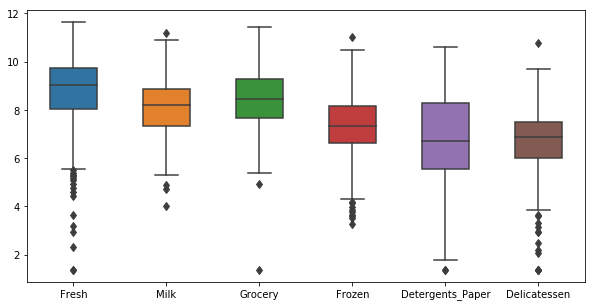

In [11]:
# Review boxplots with 1.5 whiskers
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(ax=ax, data=log_data, fliersize=6, whis=1.5, width=0.5);

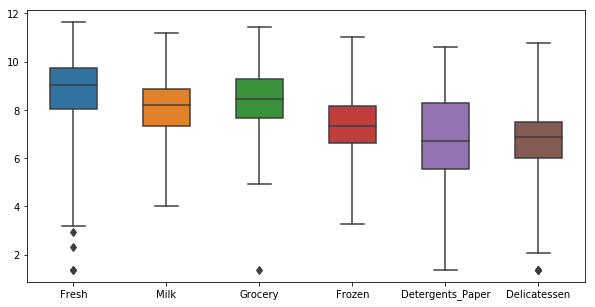

In [12]:
# Review boxplots with extreme 3 whiskers
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(ax=ax, data=log_data, fliersize=6, whis=3, width=0.5);

In [13]:
from collections import Counter

# Get counts for each index
counts = Counter(outliers_abnormal)

# Identify indexes that have outliers for more than one feature
multiple = [k for (k,v) in counts.items() if v > 1]

print("Samples with multiple feature outliers:")
display(pd.DataFrame(log_data.loc[multiple]))

Samples with multiple feature outliers:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
128,4.948760,9.087947,8.249052,4.962845,6.968850,1.386294
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225
65,4.454347,9.950371,10.732672,3.610918,10.095429,7.261225
66,2.302585,7.336286,8.911665,5.170484,8.151622,3.332205
75,9.923241,7.037028,1.386294,8.391176,1.386294,6.883463


In [14]:
# Review outliers based on 3 IQR
outliers_extreme = iqr_outliers(3)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.302585,7.336286,8.911665,5.170484,8.151622,3.332205
95,1.386294,7.979681,8.740817,6.089045,5.411646,6.565265
218,2.944439,8.923325,9.629445,7.159292,8.475954,8.759826
338,1.386294,5.811141,8.856803,9.655154,2.772589,6.311735


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923241,7.037028,1.386294,8.391176,1.386294,6.883463


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
109,7.249215,9.724959,10.274603,6.513230,6.729824,1.386294
128,4.948760,9.087947,8.249052,4.962845,6.968850,1.386294
142,10.519673,8.875287,9.018453,8.005033,3.044522,1.386294
187,7.799343,8.987572,9.192176,8.743532,8.149024,1.386294


In [15]:
# List of any indices to keep after manual review
keep = [218]

# Isolate outliers to remove
outliers = [x for x in outliers_extreme if x not in keep]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer: Reviewing the boxplot at 1.5 times the IQR range the Fresh, Frozen and Delicatessen features have groups of data points just outside the IQR step.  My intuition is we really don't want to remove all of these outliers as they could be informative to customer purchase patterns.  We should focus more on the extreme outliers that may impact the clustering algorithms ability to generalize the data. **

** There are 5 data points that are outliers at 1.5 times the IQR range for more than one feature.  The indices for these data points are 65, 66, 75, 128 and 154.  This could be due to the fact the features are highly correlated so if a data point is an outlier with one feature it is probable to be an outlier for other correlated features.  Another explanation could be smaller merchants that just have lower purchase volume across several products correlated or not.  In both scenarios it may not necessarily mean the data point is abnormal and should be removed just because it has outliers in multiple categories.  A manual review of each data point truly is warranted. **

** Data point 65 has outliers for Fresh (4.45) and Frozen (3.61) and although these features are not correlated the log values put the points just outside of the 1.5 IQR step.  This data point will not be removed.  Data point 66 has outliers for Fresh (2.3) and Delicatessen (3.33) and remains an extreme outlier for Fresh.  This data point will be removed.  Data point 75 has outliers for Grocery (1.38) and Detergents-Paper (1.38) and although these features are highly correlated 1.38 is the one extreme outlier for Grocery.  This data point will be removed.  Data point 128 has outliers for Fresh (4.94) and Delicatessen (1.38).  There are actually 4 data points with extreme outliers for Delicatessen with a log value of 1.38.  All 4 will be removed.  Data point 154 has outliers for Milk (4.02) and Grocery (4.92).  Milk and Grocery are correlated and these values are just outside of the 1.5 IQR step.  This data point will not be removed. **

** There are 9 data points that are outliers at 3 times the IQR range and all will be removed except 218.  Data point 218 has a log value of 2.94 for Fresh and just outside of the 3 IQR step but appears pretty normal for all other features. **

** Outlier removal is an important step especially for a clustering algorithm such as k-means.  The loss function in k-means is the sum of the squared distances between each data point and its closest centroid.  If the centroids for the clusters were placed in the locations that represent the best configuation of the clusters then the outliers would cause the loss function to be very high.  Therefore, minimizing loss function could actually result in a centroid being placed near the outlier and another centroid in between the outlier and the other data points. **

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

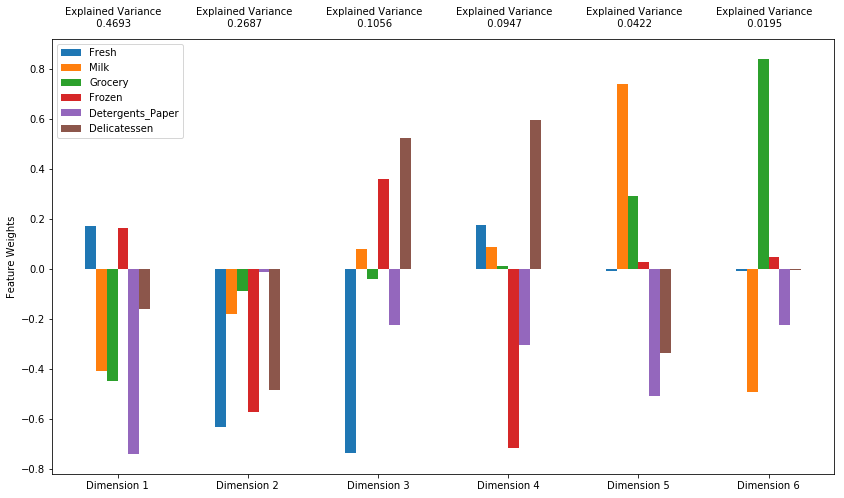

In [16]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA().fit(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

In [17]:
# View cumulative sums for explained variance
pd.DataFrame(pca_results['Explained Variance'].cumsum()).transpose()

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
Explained Variance,0.4693,0.738,0.8436,0.9383,0.9805,1.0


In [18]:
# View feature weights for each dimension
pca_results

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4693,0.1717,-0.4098,-0.4475,0.1644,-0.7410,-0.1619
Dimension 2,0.2687,-0.6310,-0.1807,-0.0883,-0.5725,-0.0145,-0.4833
Dimension 3,0.1056,-0.7360,0.0783,-0.0409,0.3581,-0.2237,0.5217
Dimension 4,0.0947,0.1745,0.0861,0.0115,-0.7171,-0.3035,0.5964
Dimension 5,0.0422,-0.0081,0.7379,0.2919,0.0270,-0.5070,-0.3353
Dimension 6,0.0195,-0.0102,-0.4913,0.8396,0.0454,-0.2269,-0.0033


**Answer: The first and second principal component has a total of .738 explained variance in the data.  The first four principal components has a total of .9383 explained variance in the data. **

** Principal component 1 is best represented by Detergents-Paper and increases when Detergents-Paper decreases with a negative feature weight of -.7410.  Principal component 2 is best represented by Fresh and Frozen and increases when both decrease with negative feature weights of -.6310 and -.5727 respectively.  Principal component 3 is best represented by Fresh and Delicatessen.  It increases when Fresh decreases with a negative feature weight of -.7360 and when Delicatessen increases with a positive feature weight of .5217.  Principal component 4 is best represented by Frozen and Delicatessen.  Similar to principal component 3 it increases when Frozen decreaes with a negative feature weight of -.7171 and when Delicatessen increases with a positive feature weight of .5964.  Principal component 5 is best represented by Milk and increases when Milk increases with a positive feature weight of .7319.  Principal component 6 is best represented by Grocery and increases when Grocery increases with a positive feature weight of .8396. **

** The first four principal components reflect decreased spending on Detergents-Paper in dimension 1 and Fresh/Frozen in dimension 2.  In dimension 3 and 4 it reflects a negative relationship in spending between Fresh/Delicatessen and Frozen/Delicatessen.  **

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [19]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-5.3358,-1.7553,-0.9039,0.2810,0.4397,0.3310
1,2.7076,-2.5937,1.9371,-0.7157,0.6749,0.0669
2,3.5104,0.9574,-2.9298,-2.1688,4.4318,0.9960


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [20]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [21]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-5.3358,-1.7553
1,2.7076,-2.5937
2,3.5104,0.9574


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

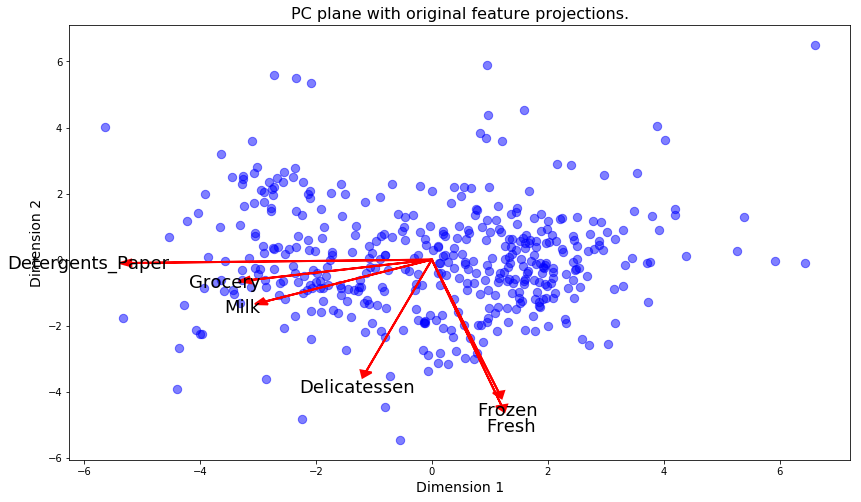

In [22]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca);

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer: One advantage of the k-means clustering algorithm is it is fairly easy to understand and can be implemented on large datasets.  It is an efficient algorithm but some of the key features are actually the primary reasons why it may not work in all circumstances.  It assumes the clusters are spherical and the data points are separable in a way that the mean value for each cluster converges towards the cluster center.  K is also an input paramteter so you must know the number of clusters beforehand and the wrong choice could produce poor results.  In addition, even if the correct choice for K is made the algorithm could converge to a local minimum and produce wrong results.  K-means makes assumptions about the data set and in the real-world data is messy so the algorithm may not work in certain scenarios. Even though clusters may be apparent to the human eye in a data visualization K-means will always adhere strictly to the algorithm.  K-means is also a hard clustering algorithm in that each data point is assigned to a cluster or not.**

** A Gaussian Mixture Model (GMM) is very good alternative clustering algorithm to K-means.  This algorithm is a probabilistic model to identify subpopulations by determining maximum liklihood for each data point belonging to the subpopulation.  A GMM uses the expectation maximization algorithm that first generates distributions with reasonable parameters and then determines for every data point how likely is it to fall within each. Similar to K-means though K is an input parameter.  It then iterates and updates the distribution parameters to maximize the likelihood of being assigned to the most probable k cluster.  One advantage is this soft clustering method.   Another key advantage is it allows data to have different physical characteristics while still assuming normality.  Therefore, a GMM allows for variation that K-means may not be able to adapt to.**

** Based on my observations of the wholesale customer data there really does not appear to be clear distinguishable clusters of data.  Although we have removed extreme outliers the biplot still shows data points that are on the outer areas of the main distribution of data points.  Finally after the log transformations each feature is now normally distributed.  Based on the discussion above comparing K-means and Gaussian Mixture Model and these facts, the Gaussian Mixture Model appears to be more suitable for this data set and will be used to identify customer segments.**

**Sources:**<br> 
**[K-means clustering](https://en.wikipedia.org/wiki/K-means_clustering)**<br>
**[K-means alternatives](https://www.datascience.com/blog/k-means-alternatives)**<br>
**[Mixture Model](https://en.wikipedia.org/wiki/Mixture_model)**<br>
**[Expectation Maximization Algorithm](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm)**

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [71]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

def run_clusterer(n):
    # Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=n, random_state=SEED).fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Find the cluster centers
    centers = clusterer.means_

    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    
    return clusterer, score

In [72]:
# Dict to hold silhouette_score values
sil_scores = {}

# Run scores for different number of clusters
for n in range(2,7):
    clusterer, score = run_clusterer(n)
    
    # Add score for each n
    sil_scores[n] = round(score,4)

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

In [73]:
# Display silhouette scores for differnet n_components
display(pd.DataFrame.from_dict(sil_scores.items()).rename(columns={0:'Components', 1:'Silhouette Score'}))

,Components,Silhouette Score
0,2,0.4252
1,3,0.1806
2,4,0.2991
3,5,0.2519
4,6,0.3262


**Answer: 2 clusters has the best silhouette score of .4252. **

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

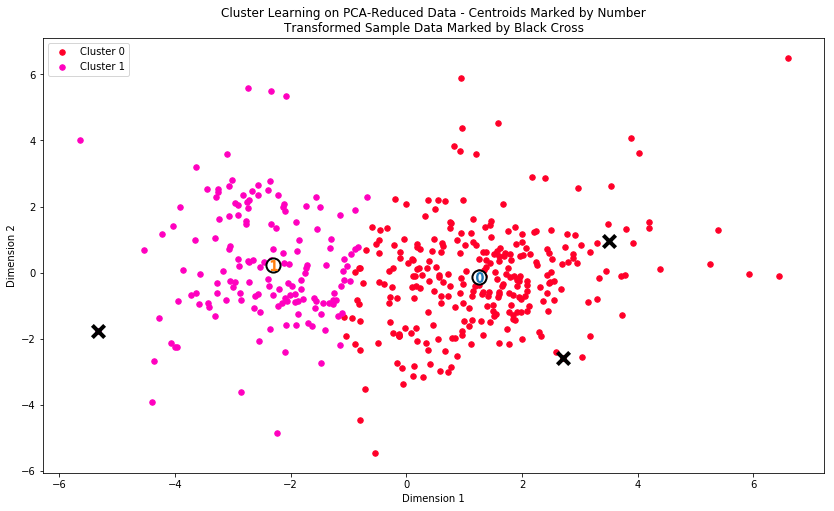

In [74]:
# Rerun for 2 components
clusterer, score = run_clusterer(2)
    
# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.means_

# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [65]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8824.0,2055.0,2686.0,1968.0,360.0,724.0
Segment 1,3827.0,8283.0,12795.0,894.0,5005.0,1085.0


In [66]:
print "Segment values relative to mean values:"
display(np.round(true_centers - data.mean()))

print "Segment values relative to median values:"
display(np.round(true_centers - data.median()))

Segment values relative to mean values:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-3176.0,-3741.0,-5265.0,-1104.0,-2521.0,-801.0
Segment 1,-8173.0,2487.0,4844.0,-2178.0,2124.0,-440.0


Segment values relative to median values:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,320.0,-1572.0,-2070.0,442.0,-456.0,-242.0
Segment 1,-4677.0,4656.0,8040.0,-632.0,4188.0,120.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer: As observed earlier all features are skewed to the right with mean greater than median so comparing the center values for each segment to the median probably makes more sense.  Segment 0 values for Fresh and Frozen are higher than the median so establishments such as cafes or restaurants would most likely represent this segment.**

**Segment 1 values for Milk, Grocery, Detergents_Paper are significantly higher than the median so establishments such as grocery stores or warehouse resellers would most likely represent this segment.**

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [67]:
print "Sample values relative to median values:"
display(np.round(samples - data.median()))

Sample values relative to median values:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7613.0,42570.0,88024.0,-500.0,40010.0,1978.0
1,2810.0,-537.0,-2694.0,33483.0,-746.0,1732.0
2,28532.0,3525.0,3498.0,1469.0,-796.0,-962.0


In [70]:
# Sample probabilities
samples_proba = clusterer.predict_proba(pca_samples)

# Display the predictions with probabilities
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster {} with probability: {:.2f}%"\
    .format(pred, samples_proba[i][pred]*100)

Sample point 0 predicted to be in Cluster 1 with probability: 99.62%
Sample point 1 predicted to be in Cluster 0 with probability: 99.98%
Sample point 2 predicted to be in Cluster 0 with probability: 100.00%


**Answer: Sample 0 has significantly larger values for Fresh, Milk, Grocery and Detergents_Paper as well as Delicatessen.  Therefore, it is best represented by segment 1 and I would expect it to be further away from the cluster center due to high values for those features.  Sample 1 has significantly larger values for Frozen and large values for Fresh and Delicatessen.  Based on the large Frozen purchases it is best represented by segment 0.  Sample 2 has significantly larger values for Fresh and large values for Milk, Grocery and Frozen.  Based on the larger Fresh purchases it is best represented by segment 0.  The predictions for each sample exactly match the assumed segments based on their purchase center values. **

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer: Delivery service frequency change would most likely not impact all customers equally.  For example, customers in segment 0 such as cafes or restaurants that rely on perishable products in their business may not be unhappy with a less frequent delivery service.  However, retail customers in segment 1 that resell refrigerated Milk, Grocery or Detergents-Paper products may not need delivery service 5 days a week.**

** The wholesale distributor could run a segmented A/B test on a statistically valid sample without replacement of customers from each segment and change their delivery service to 3 days a week.  The sample would be stratified equally for customers within each segment.  Let's assume the distributor has an existing customer satisfaction survey process with average scores ranging from 1 - 5 with 5 considered very satisfied.  After the delivery service changes it is observed survey results for customers in segment 0 decrease from 4.3 to 3.8 but customers in segment 1 only decrease from 4.6 to 4.5.  During the A/B test the distributor made no other service changes for all customers. **


| Delivery Service  | Segment 0         | Segment 1       |
| :---------------: | :---------------: | :-------------: | 
| 5 days a week     | 4.3               | 4.6             |
| 3 days a week     | 3.8               | 4.5             |

** The distributor could conclude that customers in segment 1 were not impacted by the delivery service change and would apply the change only to these customers.  Customers in segment 0 would continue to have delivery service 5 days a week. **

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer: The target variable would be the engineered feature customer segment and existing customers would be labeled based on their historical purchases.  A multi-class supervised learner would be trained on the existing customer data and this model could be used to predict the customer segment for the ten new customers.  Based on the predicted customer segment the appropriate delivery service would be offered to the new customer.  For example, new customers predicted to be in segment 0 could be offered delivery service 5 days a week and segment 1 could be offered delivery service 3 days a week depending on the actual results from the A/B test for delivery schedule changes. **

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

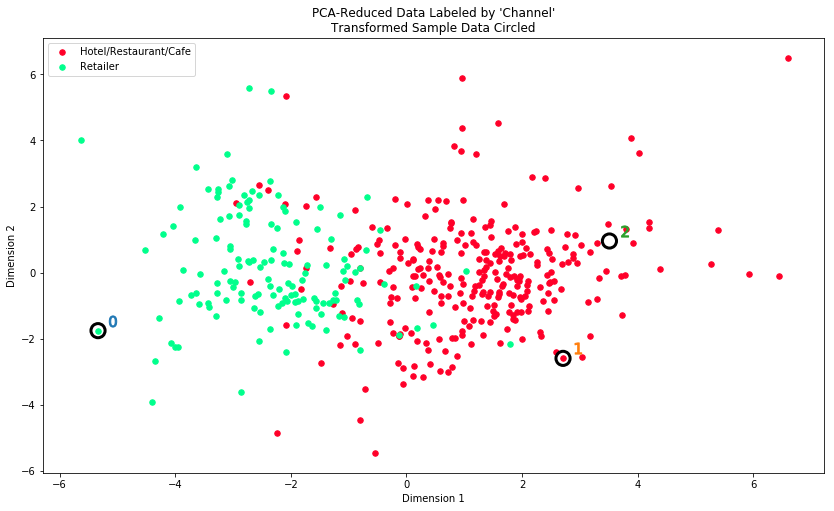

In [45]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer: The clustering algorithm and 2 clusters performs pretty well on the distribution of Hotel/Restaurant/Cafe vs. Retailer customers.  There does appear to be more overlap for Hotel/Restaurant/Cafe customers with lower values in dimension 1.  There are customer segments that would be classified as purely Hotel/Restaurant/Cafe or Retailer customers.  As suspected sample 0 is very clearly a Retailer customer.  In addition, samples 1 and 2 are clearly Hotel/Restaurant/Cafe customers.  Therefore, the classifications are consistent with my previous definitions of the customer segments.  **

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.